# Exploratory Data Analysis of NBA Players

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [44]:
df = pd.read_csv('Data/combined_individual_stats_clean.csv')

In [45]:
df.head(5)

,Unnamed: 0,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,Alex Abrines,SG,24.0,OKC,75.0,1134.0,9.0,0.567,0.759,0.158,2.5,8.9,5.6,3.4,1.7,0.6,7.4,12.7,1.3,1.0,2.2,0.094,-0.5,-1.7,-2.2,-0.1
1,1,Quincy Acy,PF,27.0,BRK,70.0,1359.0,8.2,0.525,0.800,0.164,3.1,17.1,10.0,6.0,1.2,1.6,13.3,14.4,-0.1,1.1,1.0,0.036,-2.0,-0.2,-2.2,-0.1
2,2,Steven Adams,C,24.0,OKC,76.0,2487.0,20.6,0.630,0.003,0.402,16.6,13.9,15.3,5.5,1.8,2.8,13.3,16.7,6.7,3.0,9.7,0.187,2.2,1.1,3.3,3.3
3,3,Bam Adebayo,C,20.0,MIA,69.0,1368.0,15.7,0.570,0.021,0.526,9.7,21.6,15.6,11.0,1.2,2.5,13.6,15.9,2.3,1.9,4.2,0.148,-1.6,1.8,0.2,0.8
4,4,Arron Afflalo,SG,32.0,ORL,53.0,682.0,5.8,0.516,0.432,0.160,0.6,10.1,5.3,6.2,0.3,1.1,10.8,12.5,-0.1,0.2,0.1,0.009,-4.1,-1.8,-5.8,-0.7


In [46]:
df.drop(labels = 'Unnamed: 0', axis = 1, inplace = True)

In [47]:
df.head(5)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Alex Abrines,SG,24.0,OKC,75.0,1134.0,9.0,0.567,0.759,0.158,2.5,8.9,5.6,3.4,1.7,0.6,7.4,12.7,1.3,1.0,2.2,0.094,-0.5,-1.7,-2.2,-0.1
1,Quincy Acy,PF,27.0,BRK,70.0,1359.0,8.2,0.525,0.800,0.164,3.1,17.1,10.0,6.0,1.2,1.6,13.3,14.4,-0.1,1.1,1.0,0.036,-2.0,-0.2,-2.2,-0.1
2,Steven Adams,C,24.0,OKC,76.0,2487.0,20.6,0.630,0.003,0.402,16.6,13.9,15.3,5.5,1.8,2.8,13.3,16.7,6.7,3.0,9.7,0.187,2.2,1.1,3.3,3.3
3,Bam Adebayo,C,20.0,MIA,69.0,1368.0,15.7,0.570,0.021,0.526,9.7,21.6,15.6,11.0,1.2,2.5,13.6,15.9,2.3,1.9,4.2,0.148,-1.6,1.8,0.2,0.8
4,Arron Afflalo,SG,32.0,ORL,53.0,682.0,5.8,0.516,0.432,0.160,0.6,10.1,5.3,6.2,0.3,1.1,10.8,12.5,-0.1,0.2,0.1,0.009,-4.1,-1.8,-5.8,-0.7


## Background Info on Variables

- Pos -- Position
- Age -- Age of Player at the start of February 1st of that season.
- Tm -- Team
- G -- Games
- MP -- Minutes Played
- PER -- Player Efficiency Rating: A measure of per-minute production standardized such that the league average is 15.
- TS% -- True Shooting Percentage: A measure of shooting efficiency that takes into account 2-point field goals, 3-point field goals, and free throws.
- 3PAr -- 3-Point Attempt Rate: Percentage of FG Attempts from 3-Point Range
- FTr -- Free Throw Attempt Rate: Number of FT Attempts Per FG Attempt
- ORB% -- Offensive Rebound Percentage: An estimate of the percentage of available offensive rebounds a player grabbed while he was on the floor.
- DRB% -- Defensive Rebound Percentage: An estimate of the percentage of available defensive rebounds a player grabbed while he was on the floor.
- TRB% -- Total Rebound Percentage: An estimate of the percentage of available rebounds a player grabbed while he was on the floor.
- AST% -- Assist Percentage: An estimate of the percentage of teammate field goals a player assisted while he was on the floor.
- STL% -- Steal Percentage: An estimate of the percentage of opponent possessions that end with a steal by the player while he was on the floor.
- BLK% -- Block Percentage: An estimate of the percentage of opponent two-point field goal attempts blocked by the player while he was on the floor.
- TOV% -- Turnover Percentage: An estimate of turnovers committed per 100 plays.
- USG% -- Usage Percentage: An estimate of the percentage of team plays used by a player while he was on the floor.
- OWS -- Offensive Win Shares: An estimate of the number of wins contributed by a player due to his offense.
- DWS -- Defensive Win Shares: An estimate of the number of wins contributed by a player due to his defense.
- WS -- Win Shares: An estimate of the number of wins contributed by a player.
- WS/48 -- Win Shares Per 48 Minutes: An estimate of the number of wins contributed by a player per 48 minutes (league average is approximately .100)
- OBPM -- Offensive Box Plus/Minus: A box score estimate of the offensive points per 100 possessions a player contributed above a league-average player, translated to an average team.
- DBPM -- Defensive Box Plus/Minus: A box score estimate of the defensive points per 100 possessions a player contributed above a league-average player, translated to an average team.
- BPM -- Box Plus/Minus: A box score estimate of the points per 100 possessions a player contributed above a league-average player, translated to an average team.
- VORP -- Value over Replacement Player: A box score estimate of the points per 100 TEAM possessions that a player contributed above a replacement-level (-2.0) player, translated to an average team and prorated to an 82-game season.

### Focus: Player Efficiency Rating

In [48]:
df['PER'].describe()

count    2466.000000
mean       13.038646
std         6.855648
min       -41.100000
25%         9.900000
50%        12.900000
75%        16.100000
max       133.800000
Name: PER, dtype: float64

#### What is Player Efficiency Rating?

The Player Efficiency Rating is a statistic that was developed by John Hollinger, who is now the Vice President of Basketball Operations for the Memphis Grizzlies [(1)](https://en.wikipedia.org/wiki/John_Hollinger). In the 1990's he was motivated to find the ultimate basketball statistic, one that could take into account all aspects, both good and bad, to derive a player's overall contribution. The result was the PER. 

It is a statistic that in essence "sums up all a player's positive accomplishments, subtracts the negative accomplishments, and returns a per-minute rating of a player's performance" [2](https://www.basketball-reference.com/about/per.html). So it takes into account good things -- field goals, free throws, 3-pointers, assists, rebounds, blocks and steals -- and bad things -- missed shots, turnovers, fouls -- and returns a value that is then adjusted to a per-minute basis so that the number can then be compared across all players, no matter if they are a starter or substitute. [3](https://www.washingtonpost.com/what-is-player-efficiency-rating/37939879-1c08-4cfa-aff3-51c2a2ae060e_note.html?utm_term=.916e0fa414eb)

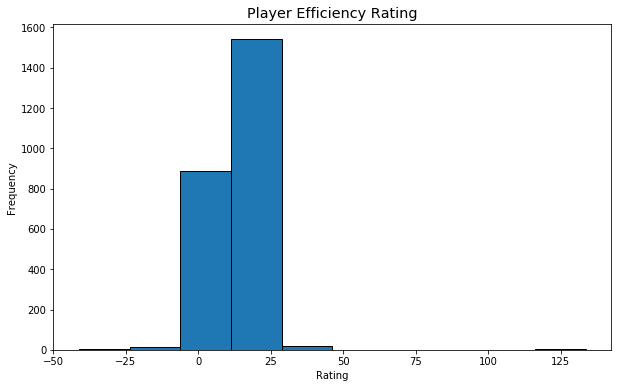

In [49]:
plt.figure(figsize = (10, 6))
df['PER'].plot(kind = 'hist', edgecolor = 'black')
plt.xlabel('Rating')
plt.title('Player Efficiency Rating', size = 'x-large');

This histogram is a little awkward as it doesn't really tell us anything about PER. However, since this statistic is the combination of offensive and defensive statistics we can look further into PER's relationship with such variables as True Shooting % (TS%) or Turnover % (TOV%).

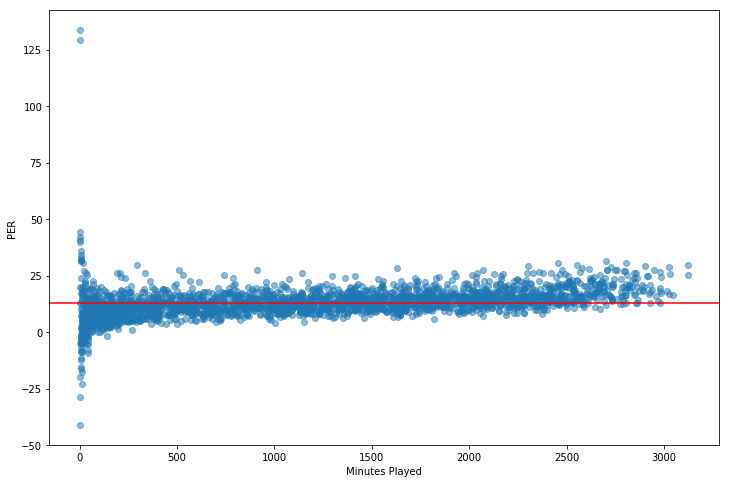

In [50]:
# scatter plot of PER and Minutes Played
plt.figure(figsize = (12, 8))
plt.scatter(df['MP'], df['PER'], alpha = 0.5)
plt.axhline(np.mean(df['PER']), c = 'red')
plt.xlabel('Minutes Played')
plt.ylabel('PER');

In regards to the relationship between Minutes Played and PER, the first key observation is that there seems to be relatively little variability; most of the values are centered around PER's mean value (i.e. the red line). 

Another interesting thing to note is that as the Minutes Played gets closer to 0, there are appears to be slightly greater variance. This isn't unusual however as players that play less have a PER that is more likely to be influenced by extreme events, i.e. if they only play ten minutes total and score 10 points (or turn the ball over 4 times...) the PER is more likely to fluctuate to a greater degree compared to players that have more minutes played.

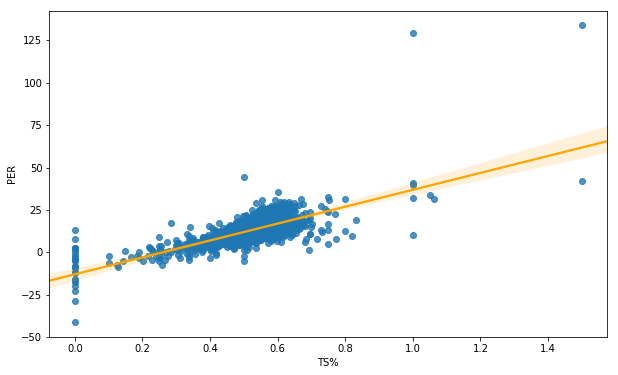

In [51]:
# import seaborn package
import seaborn as sns

# plot PER and TS%
f, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x="TS%", y="PER", data=df, ax=ax, line_kws={"color": "orange"});

### Observations

Looks like there appears to be a somewhat strong positive relationship between True Shooting % and PER, meaning that generally the better you shoot the higher your PER is going to be. However, we can also see that there appears to be some outliers on both ends of the spectrum -- i.e. there are some players that haven't missed a shot (the points in the upper right part of the graph) and players that haven't taken a shot yet but have contributed (either positively or negatively) in some way.

#### Resources
- [1](https://stackoverflow.com/questions/48145924/different-colors-for-points-and-line-in-seaborn-regplot)
- [2](https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot)

In [52]:
df.sort_values(by='PER', ascending = False).head(5)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
341,Naz Mitrou-Long,SG,24.0,UTA,1.0,1.0,133.8,1.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.1,0.0,0.1,2.712,68.6,-14.2,54.4,0.0
2257,DeAndre Liggins,SG,25.0,MIA,1.0,1.0,129.1,1.0,0.0,0.0,100.0,0.0,62.8,0.0,0.0,0.0,0.0,47.8,0.0,0.0,0.0,2.123,47.8,-23.1,24.8,0.0
1542,Sim Bhullar,C,22.0,SAC,3.0,3.0,44.3,0.5,0.0,0.0,0.0,36.5,18.9,78.5,0.0,26.3,0.0,29.4,0.0,0.0,0.0,0.389,9.4,17.1,26.6,0.0
67,Anthony Brown,SF,25.0,MIN,1.0,4.0,41.9,1.5,1.0,0.0,0.0,0.0,0.0,41.7,0.0,0.0,0.0,11.1,0.0,0.0,0.0,0.571,17.1,-15.0,2.1,0.0
1824,Eric Moreland,PF,23.0,SAC,3.0,2.0,40.8,1.0,0.0,0.0,0.0,54.8,28.4,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.431,5.8,-10.2,-4.5,0.0


Once we sort the dataframe by PER, we're able to better gather information about the outliers. As we can see the points that were in the upper right hand corner were players that played no more than 5 minutes the whole season! However, they did some good things in that short time which is the reason for the skewed PER rating. 

Let's adjust this so that we only include players that average over 6.09 Minutes/ Game.[*](http://insider.espn.com/nba/hollinger/statistics)

In [53]:
per_qualify = df['MP'] / df['G'] >= 6.09

In [54]:
df[per_qualify].sort_values(by='PER', ascending = False).head(5)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
1126,Stephen Curry,PG,27.0,GSW,79.0,2700.0,31.5,0.669,0.554,0.250,2.9,13.6,8.6,33.7,3.0,0.4,12.9,32.6,13.8,4.1,17.9,0.318,12.4,0.1,12.5,9.8
1612,Anthony Davis,PF,21.0,NOP,68.0,2455.0,30.8,0.591,0.010,0.384,8.0,24.1,16.1,11.6,2.1,6.2,6.3,27.8,9.9,4.2,14.0,0.274,4.2,3.0,7.1,5.7
993,Russell Westbrook,PG,28.0,OKC,81.0,2802.0,30.6,0.554,0.300,0.433,5.4,28.8,17.1,57.3,2.3,0.9,15.9,41.7,8.5,4.6,13.1,0.224,10.9,4.7,15.6,12.4
2119,Kevin Durant,SF,25.0,OKC,81.0,3122.0,29.8,0.635,0.291,0.477,2.2,18.6,10.8,26.7,1.7,1.5,12.2,33.0,14.8,4.4,19.2,0.295,8.4,0.4,8.8,8.5
193,James Harden,SG,28.0,HOU,72.0,2551.0,29.8,0.619,0.498,0.502,1.8,15.2,8.6,45.1,2.4,1.7,15.1,36.1,11.6,3.8,15.4,0.289,9.6,1.3,10.9,8.3


That's better! Now we only have the qualified players. Let's go ahead and replot this and see what we get.

In [55]:
# create dataframe that includes players that averaged at least 6.09 minutes per game
df_per_qualify = df[per_qualify]
print('This is the shape of the original data frame: ', df.shape)
print('This is the shape of the data frame with players that averaged at least 6.09 min/ game: ', df_per_qualify.shape)

This is the shape of the original data frame:  (2466, 26)
This is the shape of the data frame with players that averaged at least 6.09 min/ game:  (2295, 26)


In [56]:
print('In the previous step, we removed ',(2466 - 2295) / (2466) * 100,'% of the observations.')

In the previous step, we removed  6.934306569343065 % of the observations.


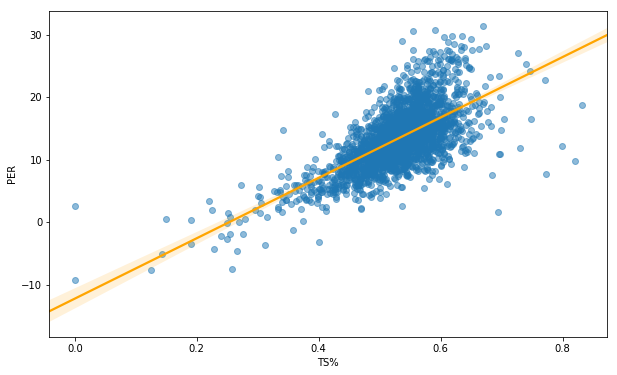

In [57]:
# plot PER and TS%
f, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x="TS%", y="PER", data=df_per_qualify, ax=ax, scatter_kws={'alpha':0.5}, line_kws={"color": "orange"});

This looks a lot better than the original graph with the outliers. We can see that TS% has a pretty strong relationship with PER; however, removing the outliers has allowed us to see that it does do quite as well as it appeared at first. 

In the vicinity of TS% = 0.6 and PER = 22, there appears to be a subset of players that positively deviate from the norm, i.e. they are contributing positively in another facet of the game. 

Let's dive deeper and see what we find!

In [58]:
df_per_qualify[(df_per_qualify['PER'] > 20) & (df_per_qualify['TS%'] > 0.5)].head(10)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
2,Steven Adams,C,24.0,OKC,76.0,2487.0,20.6,0.630,0.003,0.402,16.6,13.9,15.3,5.5,1.8,2.8,13.3,16.7,6.7,3.0,9.7,0.187,2.2,1.1,3.3,3.3
6,LaMarcus Aldridge,C,32.0,SAS,75.0,2509.0,25.0,0.570,0.068,0.296,10.8,17.3,14.0,11.3,0.9,3.0,6.8,29.1,7.4,3.5,10.9,0.209,3.0,0.3,3.3,3.3
15,Giannis Antetokounmpo,PF,23.0,MIL,75.0,2756.0,27.3,0.598,0.100,0.457,6.7,25.3,16.0,23.7,2.0,3.3,11.7,31.2,8.3,3.6,11.9,0.207,3.9,1.9,5.8,5.4
66,MarShon Brooks,SG,29.0,MEM,7.0,193.0,26.1,0.629,0.314,0.225,4.7,8.0,6.3,25.9,2.9,1.5,12.5,29.8,0.6,0.2,0.7,0.179,5.7,-1.7,4.1,0.3
76,Trey Burke,PG,25.0,NYK,36.0,785.0,21.0,0.563,0.273,0.148,1.8,8.2,5.0,36.4,1.5,0.4,9.5,25.1,2.0,0.3,2.4,0.145,4.2,-3.2,1.0,0.6
78,Jimmy Butler,SG,28.0,MIN,59.0,2164.0,23.7,0.590,0.217,0.461,4.2,12.7,8.4,20.6,2.7,1.0,8.9,24.9,7.1,1.8,8.9,0.198,4.9,0.1,5.0,3.8
84,Clint Capela,C,23.0,HOU,74.0,2034.0,24.5,0.650,0.001,0.380,13.5,30.8,22.2,5.7,1.4,5.7,11.5,19.4,6.2,4.1,10.2,0.242,0.1,2.9,3.0,2.6
111,DeMarcus Cousins,C,27.0,NOP,48.0,1737.0,22.6,0.583,0.340,0.456,6.8,30.9,19.2,23.0,2.2,3.5,18.9,31.9,1.5,3.2,4.7,0.130,1.9,3.6,5.5,3.3
119,Stephen Curry,PG,29.0,GSW,51.0,1631.0,28.2,0.675,0.580,0.350,2.7,14.4,9.0,30.3,2.4,0.4,13.3,31.0,7.2,1.9,9.1,0.267,9.9,-1.3,8.6,4.4
121,Anthony Davis,PF,24.0,NOP,75.0,2727.0,28.9,0.612,0.111,0.409,7.7,24.8,16.5,10.8,2.0,5.6,8.6,30.0,8.8,4.9,13.7,0.241,2.8,2.3,5.2,4.9


#### Observation

Just to clarify, the players we are focusing on are located here:

![TS% v. PER Graph](ts%_graph_highlight.png)

As we can see there is something different about these players that causes them to deviate slightly upward. From the dataframe above we can see that included in this section are some of the top players in the game like Steph Curry, Anthony Davis and Giannis Antetokounmpo. 

This brings us to the topic of 'five-tool' players. Originally coined in baseball for describing a player that could hit, hit for power, field, run and had incredible arm strength, the term has found its way into basketball circles as well. For basketball a [five tool player](https://www.youtube.com/watch?v=jar2feW5Ygw) is one that performs well in each of the following:

- shooting; can score from multiple positions on the court
- pass; more specifically making a pass to a teammate whose in a position where they can make a play
- dribble; ability to create a shot or passing lane
- defend; can lock up an opposing player and can guard multiple positions
- intangibles; court/situational 'awareness', i.e. being smart and not making boneheaded plays

While the last one is somewhat hard to determine from a statistical standpoint (at least according to my current knowledge), the other four are not. Due to the rarity of such players, it is very hard to pinpoint players the truly go above and beyond in all five areas. However, it seems likely that a good portion of these players are at least above average in one or more areas besides their TS%. 

With that let's take a deeper dive.

##### Resources
- [1](https://www.youtube.com/watch?v=jar2feW5Ygw)
- [2](https://stackoverflow.com/questions/32370281/how-to-embed-image-or-picture-in-jupyter-notebook-either-from-a-local-machine-o)

In [59]:
# create subset of the data that includes players that are approximately located in the highlighted section of the graph
high_per_df = df_per_qualify[(df_per_qualify['PER'] > 20) & (df_per_qualify['TS%'] > 0.5)] 

high_per_df.head(5)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
2,Steven Adams,C,24.0,OKC,76.0,2487.0,20.6,0.630,0.003,0.402,16.6,13.9,15.3,5.5,1.8,2.8,13.3,16.7,6.7,3.0,9.7,0.187,2.2,1.1,3.3,3.3
6,LaMarcus Aldridge,C,32.0,SAS,75.0,2509.0,25.0,0.570,0.068,0.296,10.8,17.3,14.0,11.3,0.9,3.0,6.8,29.1,7.4,3.5,10.9,0.209,3.0,0.3,3.3,3.3
15,Giannis Antetokounmpo,PF,23.0,MIL,75.0,2756.0,27.3,0.598,0.100,0.457,6.7,25.3,16.0,23.7,2.0,3.3,11.7,31.2,8.3,3.6,11.9,0.207,3.9,1.9,5.8,5.4
66,MarShon Brooks,SG,29.0,MEM,7.0,193.0,26.1,0.629,0.314,0.225,4.7,8.0,6.3,25.9,2.9,1.5,12.5,29.8,0.6,0.2,0.7,0.179,5.7,-1.7,4.1,0.3
76,Trey Burke,PG,25.0,NYK,36.0,785.0,21.0,0.563,0.273,0.148,1.8,8.2,5.0,36.4,1.5,0.4,9.5,25.1,2.0,0.3,2.4,0.145,4.2,-3.2,1.0,0.6


In [60]:
# sort values by AST%
high_per_df.sort_values(by = 'AST%', ascending = False).head(8)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
993,Russell Westbrook,PG,28.0,OKC,81.0,2802.0,30.6,0.554,0.300,0.433,5.4,28.8,17.1,57.3,2.3,0.9,15.9,41.7,8.5,4.6,13.1,0.224,10.9,4.7,15.6,12.4
1368,Chris Paul,PG,30.0,LAC,74.0,2420.0,26.2,0.575,0.295,0.294,1.8,12.0,7.0,52.7,3.1,0.4,13.4,27.1,9.2,3.5,12.7,0.253,7.3,0.5,7.8,6.0
708,James Harden,PG,27.0,HOU,81.0,2947.0,27.4,0.613,0.493,0.575,3.5,20.9,12.2,50.7,2.0,1.0,19.5,34.2,11.5,3.6,15.0,0.245,8.7,1.5,10.1,9.0
504,Russell Westbrook,PG,29.0,OKC,80.0,2914.0,24.7,0.524,0.193,0.336,5.6,25.7,15.3,49.8,2.5,0.6,16.4,34.1,5.5,4.5,10.1,0.166,5.1,3.1,8.2,7.5
1472,Russell Westbrook,PG,27.0,OKC,80.0,2750.0,27.6,0.554,0.236,0.397,6.1,18.1,12.4,49.6,2.9,0.6,16.8,31.6,10.0,4.0,14.0,0.245,7.6,2.4,10.0,8.3
2333,Chris Paul,PG,28.0,LAC,62.0,2171.0,25.9,0.580,0.244,0.397,2.0,11.4,6.9,48.9,3.5,0.1,12.4,23.7,9.0,3.2,12.2,0.270,6.8,0.6,7.4,5.2
1856,Chris Paul,PG,29.0,LAC,82.0,2857.0,26.0,0.596,0.298,0.274,2.1,12.5,7.4,47.4,2.8,0.4,12.7,23.7,12.9,3.2,16.1,0.270,7.5,0.0,7.5,6.9
1964,Russell Westbrook,PG,26.0,OKC,67.0,2302.0,29.1,0.536,0.196,0.445,5.9,16.7,11.4,47.0,3.0,0.5,14.3,38.4,7.5,3.2,10.6,0.222,8.8,2.2,11.0,7.6


In [61]:
print('The mean AST% of qualified PER players is: ', np.mean(df_per_qualify['AST%']))

The mean AST% of qualified PER players is:  13.297952069716795


#### Observation

Just as a reminder, AST% is an estimate of the percentage of teammate field goals a player assisted while he was on the floor. As we can see, Russell Westbrook and Chris Paul dominate the top of this list! 

(Another FYI - these observations are from different seasons, as the data is from the past 5 years, not including this most recent 2018-2019 season as it is still in progress.)

If you look at the top three percentages -- 57.3, 52.7, 50.7 -- we can see that during these seasons, that whenever Russell Westbrook, Chris Paul and James Harden were on the court they were providing at least 50% of the assists which is insanely high compared to the mean of ~13.29 (gathered from the data set with qualified PER players). 

Despite each of these players being some of the top in the whole league, they are statiscally putting the team first!

The next facet we'll look at is rebounding. While technically not included in our original assessment of the 'five-tool' player, it can be said that rebounding is a subset of the defend category. 

Further, we'll be taking a look at three separate components of rebounding, namely: 

- ORB% -- Offensive Rebound Percentage: An estimate of the percentage of available offensive rebounds a player grabbed while he was on the floor.
- DRB% -- Defensive Rebound Percentage: An estimate of the percentage of available defensive rebounds a player grabbed while he was on the floor.
- TRB% -- Total Rebound Percentage: An estimate of the percentage of available rebounds a player grabbed while he was on the floor.

In [62]:
print('The mean TRB% of a qualified PER players is: ', np.mean(df_per_qualify['TRB%']))

The mean TRB% of a qualified PER players is:  9.94814814814813


In [63]:
# sort values by TRB%
high_per_df.sort_values(by = 'TRB%', ascending = False).head(8)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
267,DeAndre Jordan,C,29.0,LAC,77.0,2424.0,20.2,0.648,0.000,0.540,15.1,37.6,26.5,7.1,0.8,2.4,16.1,15.2,6.0,3.4,9.4,0.186,0.5,1.6,2.1,2.5
139,Andre Drummond,C,24.0,DET,78.0,2625.0,22.9,0.555,0.012,0.448,16.4,36.4,26.2,14.3,2.2,4.3,15.9,21.2,4.6,5.7,10.3,0.189,0.2,5.3,5.5,5.0
509,Hassan Whiteside,C,28.0,MIA,54.0,1364.0,24.1,0.573,0.003,0.315,14.3,36.6,25.4,6.9,1.4,5.9,12.3,24.7,2.3,3.0,5.3,0.187,-2.1,2.3,0.2,0.8
1965,Hassan Whiteside,C,25.0,MIA,48.0,1142.0,26.2,0.619,0.000,0.403,15.6,34.7,25.4,1.0,1.2,9.2,11.3,21.1,2.8,2.4,5.3,0.221,-1.6,0.7,-0.9,0.3
651,Andre Drummond,C,23.0,DET,81.0,2409.0,20.9,0.518,0.008,0.390,15.1,36.2,25.2,6.0,2.6,3.1,12.5,22.4,1.4,5.3,6.7,0.133,-2.1,2.9,0.9,1.8
1749,DeAndre Jordan,C,26.0,LAC,82.0,2820.0,21.0,0.638,0.007,0.882,16.2,32.4,24.5,3.2,1.5,5.4,12.8,13.6,7.4,5.4,12.8,0.217,0.9,3.2,4.1,4.3
817,Boban Marjanovic,C,28.0,DET,35.0,293.0,29.6,0.606,0.000,0.439,16.5,32.5,24.2,5.3,1.0,3.4,6.0,25.3,1.2,0.5,1.7,0.280,1.0,-0.9,0.1,0.2
775,DeAndre Jordan,C,28.0,LAC,81.0,2570.0,21.8,0.673,0.003,0.737,13.3,34.6,24.2,5.7,1.0,4.3,13.1,15.3,7.2,4.6,11.8,0.221,1.0,3.0,4.1,3.9


#### Observation

Similar to the top values in the AST% column, TRB% appears to be dominated by just a few players, namely DeAdnre Jordan, Andre Drummon, Hassan Whiteside and Boban Marjanovic. 

The individuals are getting close to a quarter of team's total rebounds while they are on the court and consider that the average field goal percentage is approximately 45% (i.e. players on average miss a shot 55% of the time), that adds of to a lot of opportunities for a rebound.

In [64]:
print('The mean ORB% of a qualified PER players is: ', np.mean(df_per_qualify['ORB%']))

The mean ORB% of a qualified PER players is:  4.976209150326801


In [65]:
high_per_df.sort_values(by = 'ORB%', ascending = False).head(8)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
804,Shawn Long,C,24.0,PHI,18.0,234.0,24.1,0.595,0.174,0.321,19.3,20.8,20.0,10.7,1.9,3.1,9.5,25.4,0.6,0.3,0.9,0.195,3.4,0.0,3.4,0.3
1630,Andre Drummond,C,21.0,DET,82.0,2502.0,21.4,0.504,0.002,0.380,18.3,30.1,24.0,3.9,1.5,4.8,9.7,22.0,3.4,4.3,7.7,0.147,-1.2,1.1,-0.2,1.2
2115,Andre Drummond,C,20.0,DET,81.0,2619.0,22.6,0.599,0.003,0.427,17.5,27.7,22.3,2.2,2.0,4.0,10.7,16.7,6.4,3.5,9.9,0.182,1.1,0.5,1.6,2.4
1298,Boban Marjanovic,C,27.0,SAS,54.0,508.0,27.7,0.662,0.000,0.655,16.9,26.2,21.7,6.6,1.2,3.5,11.5,22.8,2.3,1.2,3.4,0.325,2.7,0.9,3.6,0.7
1265,Enes Kanter,C,23.0,OKC,82.0,1721.0,24.0,0.626,0.029,0.349,16.7,24.9,21.0,3.1,0.7,1.5,12.2,23.4,6.0,2.1,8.1,0.226,1.3,-3.1,-1.7,0.1
2,Steven Adams,C,24.0,OKC,76.0,2487.0,20.6,0.630,0.003,0.402,16.6,13.9,15.3,5.5,1.8,2.8,13.3,16.7,6.7,3.0,9.7,0.187,2.2,1.1,3.3,3.3
270,Enes Kanter,C,25.0,NYK,71.0,1830.0,24.0,0.630,0.003,0.258,16.6,30.6,23.6,9.4,1.0,1.7,13.3,21.8,5.5,2.1,7.6,0.198,2.4,0.1,2.5,2.1
817,Boban Marjanovic,C,28.0,DET,35.0,293.0,29.6,0.606,0.000,0.439,16.5,32.5,24.2,5.3,1.0,3.4,6.0,25.3,1.2,0.5,1.7,0.280,1.0,-0.9,0.1,0.2


#### Observation

While a few familar names appear -- Andre Drummond and Boban Marjanovic -- there are a few new names as well. Shawn Long tops out the list at 19.3%, meaning that of all the offensive rebound opportunities his team had while he was on the court, he grabbed them approximately 20% of the time. 

The San Antonio Spurs, who are led by future hall of fame coach Gregg Popovich, have a pretty clear cut philosophy when it comes to offensive rebounds, as ex-Spurs assistant coach (now head coach of the Philadelphia 76ers) Brett Brown stated they would say the following to their players: "We don't care if you get an offensive rebound in your entire life". [(1)](http://www.espn.com/nba/story/_/id/14505051/transition-defense-left-offensive-rebounds-cutting-room-floor)

This focus toward transition defense has become the dominant viewpoint for much of the NBA. When you also look to the fact that the league's overall pace keeps trending upward and the rise in 3-point attempts means that offensive rebounds are becoming less of a priority for teams. 

However, despite this trend there are advantages to grabbing offensive rebounds. The most obvious is that it gives your team a second chance to score. Given more opportunities to score, a team is generally going to score more points i.e. more points = higher probability of winning!

In [66]:
print('The mean DRB% of a qualified PER players is: ', np.mean(df_per_qualify['DRB%']))

The mean DRB% of a qualified PER players is:  14.92989106753813


In [67]:
high_per_df.sort_values(by = 'DRB%', ascending = False).head(8)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
267,DeAndre Jordan,C,29.0,LAC,77.0,2424.0,20.2,0.648,0.000,0.540,15.1,37.6,26.5,7.1,0.8,2.4,16.1,15.2,6.0,3.4,9.4,0.186,0.5,1.6,2.1,2.5
509,Hassan Whiteside,C,28.0,MIA,54.0,1364.0,24.1,0.573,0.003,0.315,14.3,36.6,25.4,6.9,1.4,5.9,12.3,24.7,2.3,3.0,5.3,0.187,-2.1,2.3,0.2,0.8
139,Andre Drummond,C,24.0,DET,78.0,2625.0,22.9,0.555,0.012,0.448,16.4,36.4,26.2,14.3,2.2,4.3,15.9,21.2,4.6,5.7,10.3,0.189,0.2,5.3,5.5,5.0
651,Andre Drummond,C,23.0,DET,81.0,2409.0,20.9,0.518,0.008,0.390,15.1,36.2,25.2,6.0,2.6,3.1,12.5,22.4,1.4,5.3,6.7,0.133,-2.1,2.9,0.9,1.8
996,Hassan Whiteside,C,27.0,MIA,77.0,2513.0,22.6,0.579,0.000,0.368,12.8,35.3,24.0,3.8,1.1,5.0,12.0,22.7,4.2,5.3,9.5,0.181,-2.0,1.5,-0.5,0.9
1965,Hassan Whiteside,C,25.0,MIA,48.0,1142.0,26.2,0.619,0.000,0.403,15.6,34.7,25.4,1.0,1.2,9.2,11.3,21.1,2.8,2.4,5.3,0.221,-1.6,0.7,-0.9,0.3
775,DeAndre Jordan,C,28.0,LAC,81.0,2570.0,21.8,0.673,0.003,0.737,13.3,34.6,24.2,5.7,1.0,4.3,13.1,15.3,7.2,4.6,11.8,0.221,1.0,3.0,4.1,3.9
228,Dwight Howard,C,32.0,CHO,81.0,2463.0,20.5,0.577,0.008,0.639,11.0,33.8,22.2,7.1,1.0,4.4,15.1,24.2,2.9,3.9,6.8,0.132,-2.0,1.7,-0.3,1.1


#### Observation

Lastly, I think that from the viewing the top players in terms defensive rebound %, it is safe to conclude that DeAndre Jordan is a beast when it comes to the boards. Moreover, just to support this point even further, he has twice led the league in rebounding. 

Also I would like to point out that when we look at the TS% for these players, they appear to be pretty high when compared to say players like Russell Westbrook or Chris Paul (see AST% dataframe).This could potentially be explained by the fact that they are all post players, i.e. they play close to the rim. Generally they take higher percentage shots under the assumption that closer equals easier.

In [68]:
high_per_df.sort_values(by = 'STL%', ascending = False).head(10)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
350,Monte Morris,PG,22.0,DEN,3.0,25.0,27.1,0.727,0.167,0.333,0.0,9.0,4.5,41.2,5.9,0.0,12.7,13.7,0.1,0.0,0.2,0.312,3.6,-1.6,2.0,0.0
292,Kawhi Leonard,SF,26.0,SAS,9.0,210.0,26.0,0.572,0.315,0.342,3.1,19.1,11.1,17.7,4.3,3.6,11.1,30.6,0.3,0.5,0.9,0.196,2.7,3.2,5.9,0.4
1775,Kawhi Leonard,SF,23.0,SAS,64.0,2033.0,22.0,0.567,0.234,0.307,4.8,20.6,12.9,13.0,3.7,1.8,9.4,23.0,4.2,4.4,8.6,0.204,2.6,3.5,6.1,4.1
2333,Chris Paul,PG,28.0,LAC,62.0,2171.0,25.9,0.580,0.244,0.397,2.0,11.4,6.9,48.9,3.5,0.1,12.4,23.7,9.0,3.2,12.2,0.270,6.8,0.6,7.4,5.2
378,Victor Oladipo,SG,25.0,IND,75.0,2552.0,23.1,0.577,0.323,0.274,2.1,15.1,8.6,21.2,3.5,2.0,12.7,30.1,4.3,4.0,8.2,0.155,3.6,1.3,4.9,4.5
2444,Russell Westbrook,PG,25.0,OKC,46.0,1412.0,24.7,0.545,0.271,0.370,4.6,15.9,10.5,40.2,3.1,0.4,16.1,34.4,3.0,2.3,5.2,0.178,5.2,1.2,6.4,3.0
864,Nerlens Noel,C,22.0,TOT,51.0,1047.0,20.4,0.622,0.003,0.359,9.8,22.3,15.9,8.1,3.1,4.0,12.5,17.6,2.1,1.9,4.0,0.181,-0.5,3.7,3.2,1.4
886,Chris Paul,PG,31.0,LAC,61.0,1921.0,26.2,0.614,0.385,0.331,2.4,15.0,8.9,46.8,3.1,0.3,14.0,24.4,7.9,2.6,10.6,0.264,7.8,1.1,8.8,5.3
1368,Chris Paul,PG,30.0,LAC,74.0,2420.0,26.2,0.575,0.295,0.294,1.8,12.0,7.0,52.7,3.1,0.4,13.4,27.1,9.2,3.5,12.7,0.253,7.3,0.5,7.8,6.0
1607,Stephen Curry,PG,26.0,GSW,80.0,2613.0,28.0,0.638,0.482,0.251,2.4,11.4,7.0,38.6,3.0,0.5,14.3,28.9,11.5,4.1,15.7,0.288,9.6,0.3,9.9,7.9


In [69]:
high_per_df.sort_values(by = 'BLK%', ascending = False).head(10)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
953,Edy Tavares,C,24.0,TOT,2.0,28.0,21.3,0.633,0.000,0.600,16.3,26.8,21.6,5.1,0.0,17.3,24.0,13.2,0.0,0.1,0.1,0.150,-3.8,7.7,3.9,0.0
1473,Hassan Whiteside,C,26.0,MIA,73.0,2125.0,25.7,0.629,0.000,0.482,13.1,32.4,23.1,2.4,1.1,9.7,14.2,20.7,5.0,5.3,10.3,0.233,-0.9,3.4,2.5,2.4
1965,Hassan Whiteside,C,25.0,MIA,48.0,1142.0,26.2,0.619,0.000,0.403,15.6,34.7,25.4,1.0,1.2,9.2,11.3,21.1,2.8,2.4,5.3,0.221,-1.6,0.7,-0.9,0.3
742,Josh Huestis,PF,25.0,OKC,2.0,31.0,26.1,0.612,0.364,0.091,14.3,17.9,16.1,15.5,0.0,7.7,0.0,15.7,0.1,0.0,0.2,0.265,3.9,1.8,5.7,0.1
660,Joel Embiid,C,22.0,PHI,31.0,786.0,24.1,0.584,0.228,0.569,8.5,25.6,17.0,16.0,1.7,7.7,17.9,36.0,0.5,1.5,1.9,0.117,0.0,3.2,3.1,1.0
325,JaVale McGee,C,30.0,GSW,65.0,615.0,22.3,0.641,0.027,0.237,11.5,18.7,15.4,8.0,1.6,7.3,10.0,19.2,1.7,1.1,2.7,0.212,0.4,2.1,2.6,0.7
828,JaVale McGee,C,29.0,GSW,77.0,739.0,25.2,0.642,0.009,0.348,15.9,20.1,18.1,3.8,1.2,7.1,9.8,23.8,2.0,1.5,3.5,0.225,0.2,0.5,0.8,0.5
1668,Rudy Gobert,C,22.0,UTA,82.0,2158.0,21.6,0.627,0.005,0.639,14.3,27.2,20.7,8.2,1.6,7.0,16.9,14.0,5.0,4.3,9.3,0.206,0.7,5.1,5.8,4.3
871,Kyle O'Quinn,C,26.0,NYK,79.0,1229.0,20.5,0.552,0.041,0.201,13.7,24.8,19.2,14.8,1.5,6.9,14.5,18.5,2.1,1.8,3.9,0.151,-0.1,3.7,3.5,1.7
1027,Cole Aldrich,C,27.0,LAC,60.0,800.0,21.3,0.626,0.000,0.373,11.9,27.1,19.6,10.0,2.9,6.7,19.6,18.4,1.4,2.0,3.5,0.209,-1.0,5.8,4.8,1.4


In [70]:
high_per_df.sort_values(by = 'TOV%', ascending = True).head(10)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
742,Josh Huestis,PF,25.0,OKC,2.0,31.0,26.1,0.612,0.364,0.091,14.3,17.9,16.1,15.5,0.0,7.7,0.0,15.7,0.1,0.0,0.2,0.265,3.9,1.8,5.7,0.1
817,Boban Marjanovic,C,28.0,DET,35.0,293.0,29.6,0.606,0.000,0.439,16.5,32.5,24.2,5.3,1.0,3.4,6.0,25.3,1.2,0.5,1.7,0.280,1.0,-0.9,0.1,0.2
1612,Anthony Davis,PF,21.0,NOP,68.0,2455.0,30.8,0.591,0.010,0.384,8.0,24.1,16.1,11.6,2.1,6.2,6.3,27.8,9.9,4.2,14.0,0.274,4.2,3.0,7.1,5.7
1640,Jeremy Evans,SF,27.0,UTA,38.0,266.0,20.5,0.636,0.086,0.500,11.3,19.4,15.4,7.9,2.2,3.6,6.6,13.1,0.9,0.4,1.3,0.241,1.5,2.0,3.5,0.4
498,Jameel Warney,PF,24.0,DAL,3.0,27.0,22.5,0.599,0.000,0.417,15.9,21.3,18.5,0.0,0.0,0.0,6.6,25.6,0.1,0.0,0.1,0.157,-3.1,-9.1,-12.2,-0.1
6,LaMarcus Aldridge,C,32.0,SAS,75.0,2509.0,25.0,0.570,0.068,0.296,10.8,17.3,14.0,11.3,0.9,3.0,6.8,29.1,7.4,3.5,10.9,0.209,3.0,0.3,3.3,3.3
1275,Carl Landry,PF,32.0,PHI,36.0,569.0,22.4,0.605,0.052,0.364,9.1,19.2,14.0,11.1,1.0,1.2,7.1,24.0,1.8,0.3,2.1,0.176,1.5,-2.3,-0.7,0.2
1993,LaMarcus Aldridge,PF,28.0,POR,69.0,2498.0,21.8,0.507,0.011,0.253,7.2,25.5,16.5,13.0,1.3,1.9,7.2,29.8,4.0,3.5,7.5,0.144,-0.4,0.7,0.3,1.5
1505,LaMarcus Aldridge,PF,29.0,POR,71.0,2512.0,22.8,0.528,0.074,0.256,7.7,22.9,15.5,9.2,1.0,1.9,7.2,30.2,4.9,3.7,8.6,0.165,0.3,0.0,0.3,1.4
2318,Dirk Nowitzki,PF,35.0,DAL,80.0,2628.0,23.6,0.603,0.258,0.295,1.8,20.0,10.9,14.2,1.4,1.4,7.5,26.9,8.6,2.3,10.9,0.199,4.1,-0.8,3.3,3.5


In [71]:
high_per_df.sort_values(by = 'USG%', ascending = False).head(10)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
993,Russell Westbrook,PG,28.0,OKC,81.0,2802.0,30.6,0.554,0.300,0.433,5.4,28.8,17.1,57.3,2.3,0.9,15.9,41.7,8.5,4.6,13.1,0.224,10.9,4.7,15.6,12.4
1964,Russell Westbrook,PG,26.0,OKC,67.0,2302.0,29.1,0.536,0.196,0.445,5.9,16.7,11.4,47.0,3.0,0.5,14.3,38.4,7.5,3.2,10.6,0.222,8.8,2.2,11.0,7.6
626,DeMarcus Cousins,C,26.0,TOT,72.0,2465.0,25.8,0.562,0.253,0.468,7.0,29.2,18.2,25.8,2.0,3.4,13.5,36.5,3.9,3.8,7.6,0.149,3.9,2.6,6.6,5.3
193,James Harden,SG,28.0,HOU,72.0,2551.0,29.8,0.619,0.498,0.502,1.8,15.2,8.6,45.1,2.4,1.7,15.1,36.1,11.6,3.8,15.4,0.289,9.6,1.3,10.9,8.3
660,Joel Embiid,C,22.0,PHI,31.0,786.0,24.1,0.584,0.228,0.569,8.5,25.6,17.0,16.0,1.7,7.7,17.9,36.0,0.5,1.5,1.9,0.117,0.0,3.2,3.1,1.0
1118,DeMarcus Cousins,C,25.0,SAC,65.0,2246.0,23.6,0.538,0.158,0.498,7.7,28.2,18.0,17.0,2.2,3.3,13.3,35.4,2.4,3.3,5.7,0.122,1.0,1.6,2.6,2.6
1952,Dwyane Wade,SG,33.0,MIA,62.0,1971.0,21.4,0.534,0.094,0.341,3.6,9.6,6.7,32.1,2.0,0.9,14.4,34.7,2.1,1.4,3.5,0.086,2.4,-1.2,1.2,1.6
2444,Russell Westbrook,PG,25.0,OKC,46.0,1412.0,24.7,0.545,0.271,0.370,4.6,15.9,10.5,40.2,3.1,0.4,16.1,34.4,3.0,2.3,5.2,0.178,5.2,1.2,6.4,3.0
644,DeMar DeRozan,SG,27.0,TOR,74.0,2620.0,24.0,0.552,0.080,0.419,3.0,13.6,8.3,20.6,1.5,0.4,9.0,34.3,6.7,2.4,9.0,0.166,2.4,-1.5,0.9,1.9
708,James Harden,PG,27.0,HOU,81.0,2947.0,27.4,0.613,0.493,0.575,3.5,20.9,12.2,50.7,2.0,1.0,19.5,34.2,11.5,3.6,15.0,0.245,8.7,1.5,10.1,9.0


#### Observation

Below are the tables that we looked further into:

- STL% -- Steal Percentage: An estimate of the percentage of opponent possessions that end with a steal by the player while he was on the floor.
- BLK% -- Block Percentage: An estimate of the percentage of opponent two-point field goal attempts blocked by the player while he was on the floor.
- TOV% -- Turnover Percentage: An estimate of turnovers committed per 100 plays.
- USG% -- Usage Percentage: An estimate of the percentage of team plays used by a player while he was on the floor.

Interestingly, Russell Westbrook and Chris Paul make a few more appearances.

## Next Step: Win Shares

For this project, we're trying to predict who is going to make the playoffs (more specifically, if the Sacramento Kings are going to make the playoffs). So what is the most important variable that is available to us that may assist us in predicting this? Win Shares!

- WS -- Win Shares: An estimate of the number of wins contributed by a player

After all, the more wins you've got, the more higher your liklihood of making the playoffs!

ALSO, a quick public service announcement. We're going to go back to using the original data set because Win Shares is giving in absolute terms (i.e. a value of 2.0 means the player contributed 2 wins) and thus if a player didn't play that much this number is going to be lower (see chart below).

In [72]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'], dtype='object')

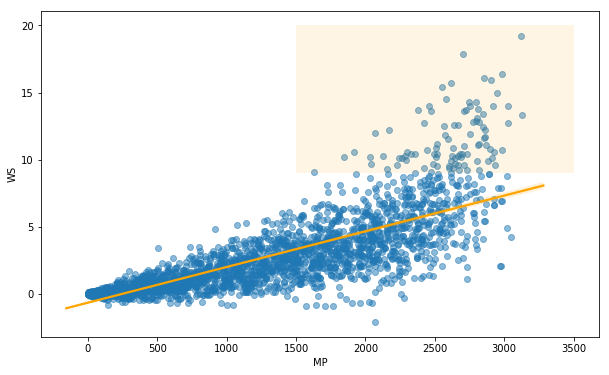

In [73]:
# plot MP and WS
f, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x="MP", y="WS", data=df, ax=ax, scatter_kws={'alpha':0.5}, line_kws={"color": "orange"})
ax.fill_between([1500,3500], 9, 20, facecolor='orange', alpha = .1, interpolate=True);

#### Observation

The above graph could be said to support the notion of a linear relationship between minutes played and win share. However, to play devil's advocate, take a look at the orange box in the upper right of the graph. 

This slight upward tick in slope seems to open the possibility that this relationship might best be described non-linearly; more specifically, the relationship may be exponential. What does this mean? You could hypothesize that after a certain point (in terms of # of minutes played) a player's contribution might begin to exponentially increase their win share. 

Of course, nothing should be concluded simply by looking at a graph. However this poses an interesting observation that we should keep in mind going forward.

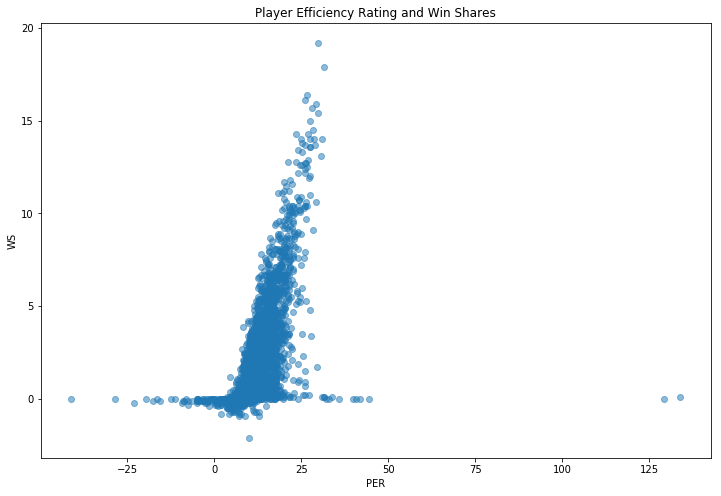

In [74]:
# scatter plot of PER and WS
plt.figure(figsize = (12, 8))
plt.scatter(df['PER'], df['WS'], alpha = 0.5)
plt.xlabel('PER')
plt.ylabel('WS')
plt.title('Player Efficiency Rating and Win Shares');

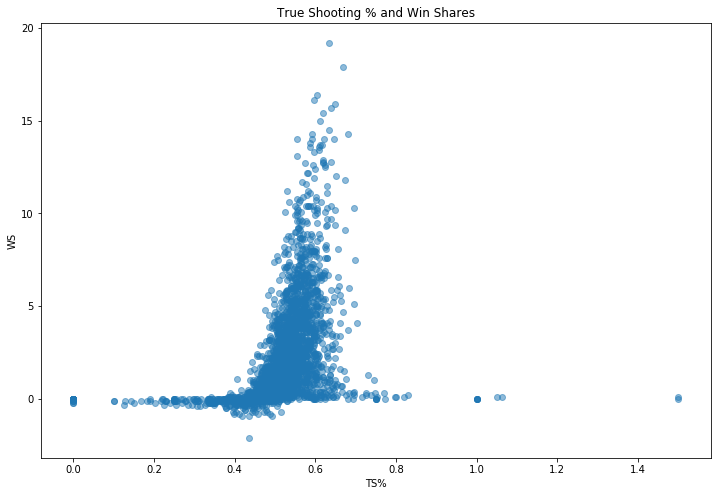

In [75]:
# scatter plot of TS% and WS
plt.figure(figsize = (12, 8))
plt.scatter(df['TS%'], df['WS'], alpha = 0.5)
plt.xlabel('TS%')
plt.ylabel('WS')
plt.title('True Shooting % and Win Shares');

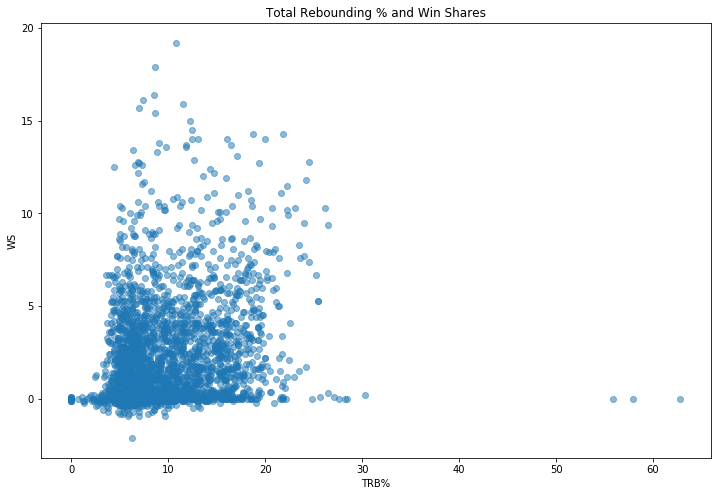

In [76]:
# scatter plot of TRB% and WS
plt.figure(figsize = (12, 8))
plt.scatter(df['TRB%'], df['WS'], alpha = 0.5)
plt.xlabel('TRB%')
plt.ylabel('WS')
plt.title('Total Rebounding % and Win Shares');

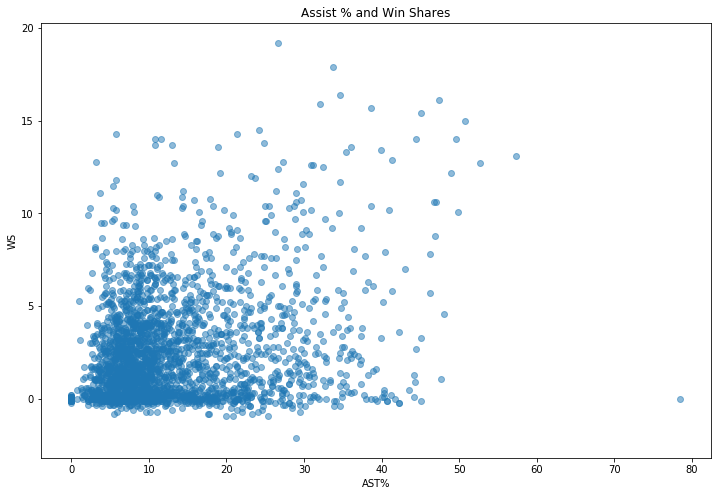

In [77]:
# scatter plot of AST% and WS
plt.figure(figsize = (12, 8))
plt.scatter(df['AST%'], df['WS'], alpha = 0.5)
plt.xlabel('AST%')
plt.ylabel('WS')
plt.title('Assist % and Win Shares');

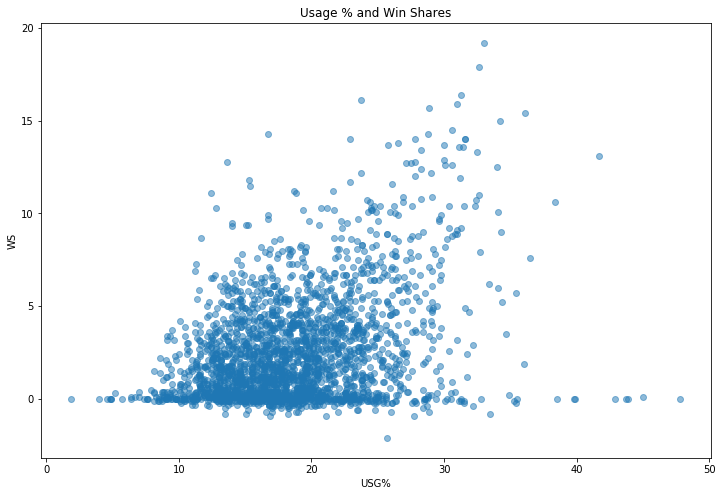

In [78]:
# scatter plot of USG% and WS
plt.figure(figsize = (12, 8))
plt.scatter(df['USG%'], df['WS'], alpha = 0.5)
plt.xlabel('USG%')
plt.ylabel('WS')
plt.title('Usage % and Win Shares');

#### Observation

The five graphs above -- PER, TS%, TRB%, AST% and USG% -- I find to be extremely interesting in that there is a progression in regards to point concentration. As we go from PER (player efficiency rating) toward usage percentage (estimate of the percentage of team plays used by a player while he was on the floor), the points get more spread out indicating a potential drop in the reliability of that variable to have any significant impact on win share.  

Perhaps unsurprisingly, the statistic with the greatest potential for indicating win shares (outside of PER) is true shooting percentage. This goes along well with what we found in the [initial analysis](https://nbviewer.jupyter.org/github/Jearny58/Springboard-DS-Portfolio/blob/master/capstone_1/basketball/Miscellaneous_Team_Stats/Exploratory-Data-Analysis-NBA-teams-playoffs.ipynb?flush_cache=true) of the team statistics, in that offense appears to have a stronger relationship with winning. 